In [1]:
# extract data from heatmaps
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv.imread("images/heatmap.png")

In [3]:
img.shape

(288, 432, 3)

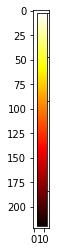

In [4]:
# approximate bounding box around the legend
legend_box = [335, 351, 32, 254] # [xmin, xmax, ymin, ymax]

# calibrate legend with data
legend_data = [5, 20] # [val1, val2]
legend_data_px = [(344,216), (344,80)] # [(x,y), (x,y)]
legend_data_px = [(legend_data_px[0][0] - legend_box[0], legend_data_px[0][1] - legend_box[2]),
                  (legend_data_px[1][0] - legend_box[0], legend_data_px[1][1] - legend_box[2])]

# crop
legend_img = img[legend_box[2]:legend_box[3], legend_box[0]:legend_box[1]]
plt.imshow(cv.cvtColor(legend_img, cv.COLOR_BGR2RGB))

## Legend Calibration

Assume:
    1. approx_val = f(R,G,B)

At calibration points:
    2. val1 = f(R1,G1,B1) at (x1,y1)
    3. val2 = f(R2,G2,B2) at (x2,y2)

At any (x_l,y_l) on the legend:
    4. val_l = f(R,G,B) at (x_l,y_l)

If we assume (x_l,y_l) lies on the line joining (x1,y1) and (x2,y2), then val can be calculated at any (x_l,y_l) assuming linear spacing.


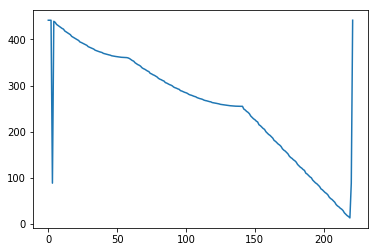

In [5]:
# Plot intensity along the legend "line":
ylist = [v for v in range(0,legend_img.shape[0])]
intensity = np.sqrt([legend_img[y,12,0]**2 + legend_img[y,12,1]**2 + legend_img[y,12,2]**2 for y in ylist])
plt.plot(ylist, intensity)

In [6]:
# find edges
intensity_jumps = [intensity[i]-intensity[i-1] > 10 for i in range(1,len(intensity))]
intensity_jumps = np.array([j for j in range(0,len(intensity_jumps)) if intensity_jumps[j] == True])
intensity_jumps

array([  3, 219, 220])

In [7]:
# for smooth legend, it's easy to pick the pick min, max:
# |----|---------x----------|----|----
#      i_min    mid-pt     i_max

i_max = np.min(intensity_jumps[intensity_jumps - len(intensity)/2 > 0]) - 1
i_min = np.max(intensity_jumps[intensity_jumps - len(intensity)/2 < 0]) + 1

print(i_min, i_max)

4 218


In [10]:
# build a list of (r,g,b)->val
rgb_list = [(legend_img[y,12,0], legend_img[y,12,1], legend_img[y,12,2]) for y in range(i_min,i_max)]
val_list = [(legend_data[1] - legend_data[0])*(y - legend_data_px[0][1])/(legend_data_px[1][1] - legend_data_px[0][1]) + legend_data[0] for y in range(i_min,i_max)]
val_list    


[24.852941176470587,
 24.74264705882353,
 24.63235294117647,
 24.522058823529413,
 24.41176470588235,
 24.301470588235293,
 24.191176470588236,
 24.080882352941178,
 23.970588235294116,
 23.860294117647058,
 23.75,
 23.639705882352942,
 23.529411764705884,
 23.419117647058822,
 23.308823529411764,
 23.198529411764707,
 23.08823529411765,
 22.977941176470587,
 22.86764705882353,
 22.75735294117647,
 22.647058823529413,
 22.53676470588235,
 22.426470588235293,
 22.316176470588236,
 22.205882352941178,
 22.095588235294116,
 21.985294117647058,
 21.875,
 21.764705882352942,
 21.654411764705884,
 21.544117647058822,
 21.433823529411764,
 21.323529411764707,
 21.21323529411765,
 21.102941176470587,
 20.99264705882353,
 20.88235294117647,
 20.772058823529413,
 20.661764705882355,
 20.551470588235293,
 20.441176470588236,
 20.330882352941174,
 20.220588235294116,
 20.110294117647058,
 20.0,
 19.889705882352942,
 19.779411764705884,
 19.669117647058826,
 19.558823529411764,
 19.448529411764707,

In [17]:
# do extraction by finding nearest value and calculate error

def valForRGB(r,g,b):
    return val_list[np.argmin(np.array([(c[0]-r)**2 + (c[1]-g)**2 + (c[2]-b)**2 for c in rgb_list]))]

results = []
for xi in range(125,300,43):
    for yi in range(56,232,43):
        (r,g,b) = (img[yi,xi,0], img[yi,xi,1], img[yi,xi,2])
        results.append((xi,yi,valForRGB(r,g,b)))
        


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  after removing the cwd from sys.path.


In [18]:

results

[(125, 56, 1.3602941176470589),
 (125, 99, 6.102941176470589),
 (125, 142, 11.066176470588236),
 (125, 185, 16.029411764705884),
 (125, 228, 20.99264705882353),
 (168, 56, 2.0220588235294117),
 (168, 99, 7.095588235294118),
 (168, 142, 12.058823529411764),
 (168, 185, 17.022058823529413),
 (168, 228, 22.095588235294116),
 (211, 56, 3.014705882352941),
 (211, 99, 7.977941176470589),
 (211, 142, 13.051470588235293),
 (211, 185, 18.014705882352942),
 (211, 228, 22.977941176470587),
 (254, 56, 4.117647058823529),
 (254, 99, 9.080882352941178),
 (254, 142, 14.044117647058824),
 (254, 185, 19.11764705882353),
 (254, 228, 24.080882352941178),
 (297, 56, 5.0),
 (297, 99, 10.073529411764707),
 (297, 142, 15.036764705882353),
 (297, 185, 20.0),
 (297, 228, 9.742647058823529)]